In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
from keras.models import Sequential

In [3]:
from tensorflow.keras import models, layers

In [77]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=18

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 16065 files belonging to 10 classes.


In [6]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

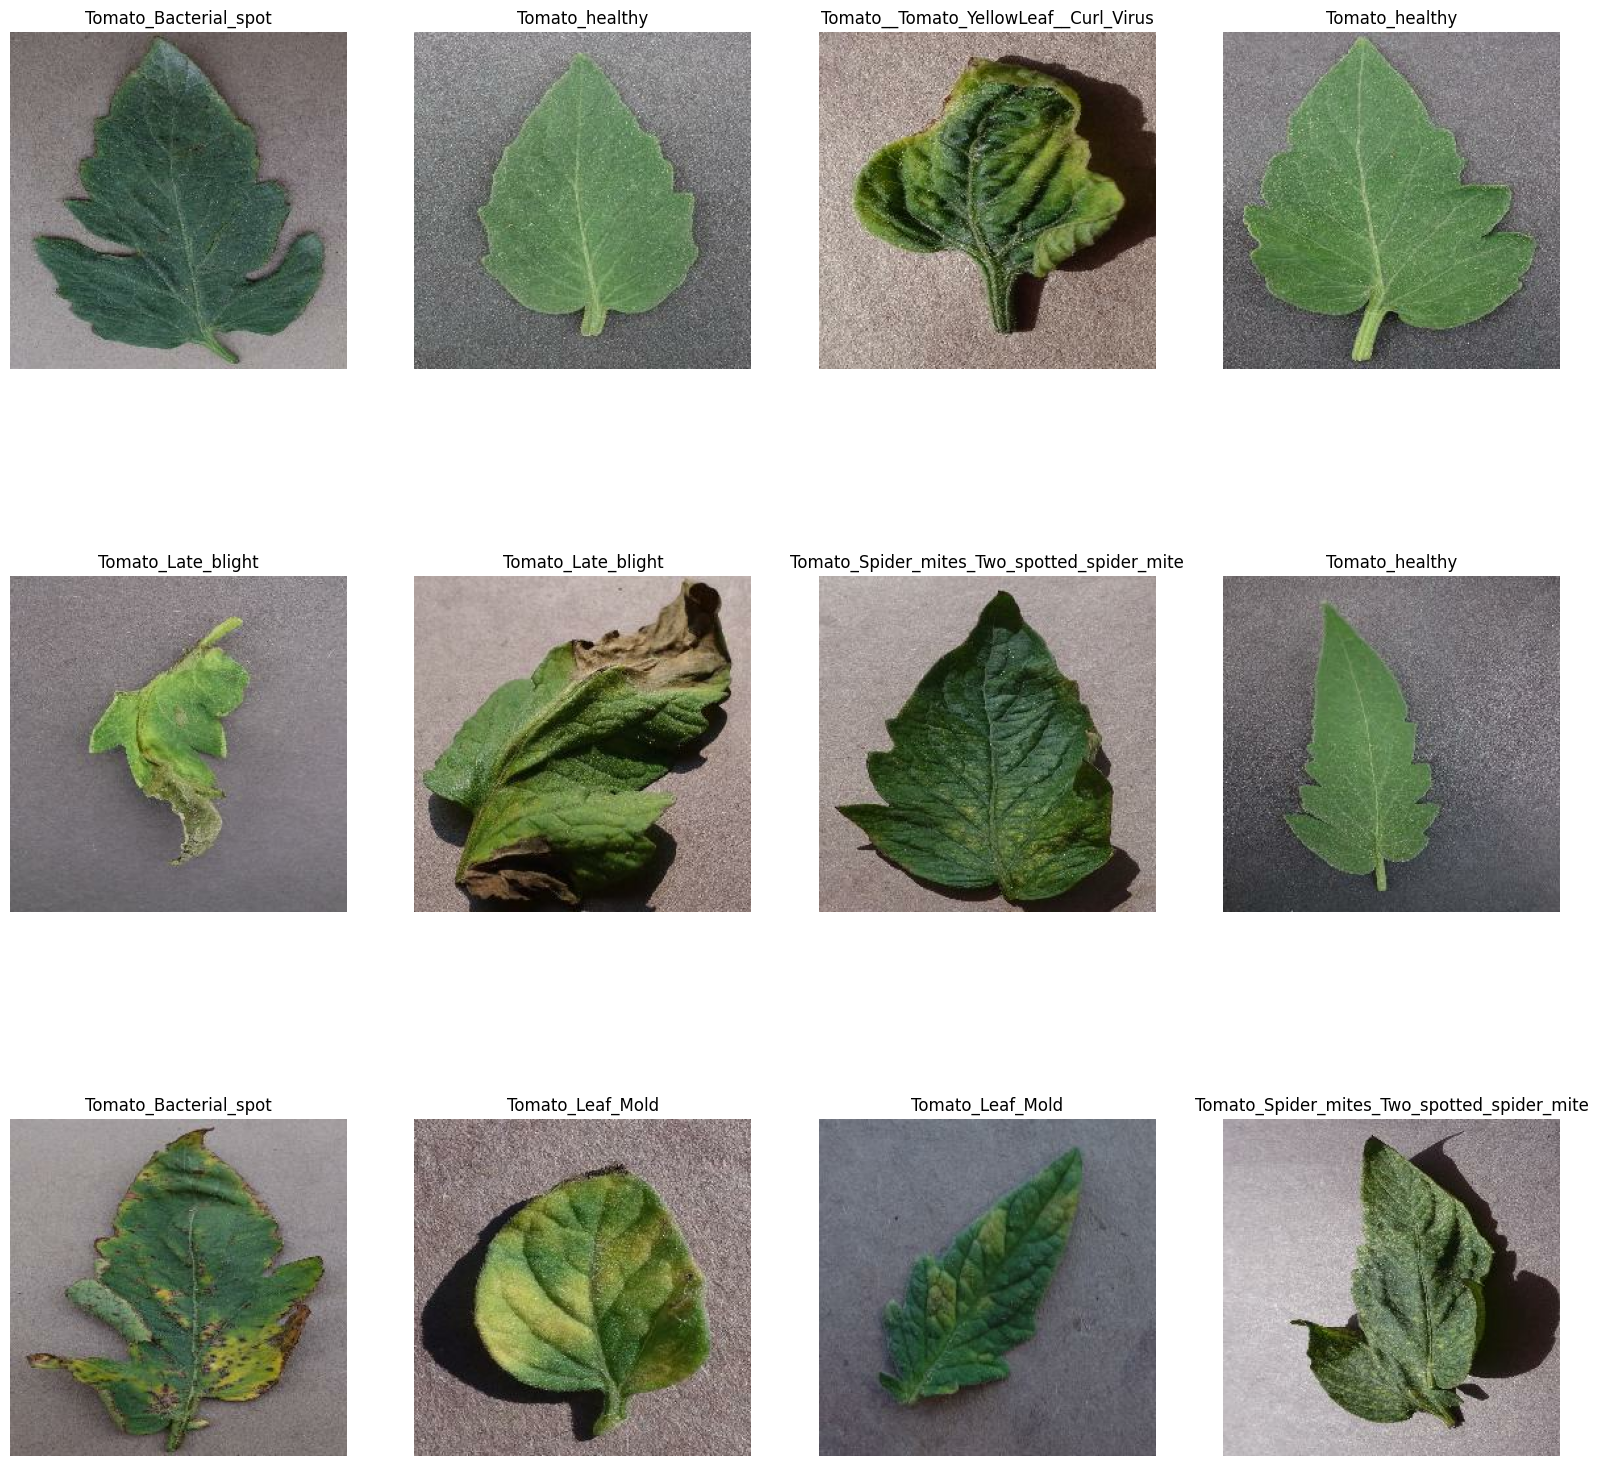

In [7]:
plt.figure(figsize=(20, 20))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [8]:
len(dataset)

503

In [9]:
train_size = 0.8
len(dataset)*train_size

402.40000000000003

In [10]:
train_ds = dataset.take(400)
len(train_ds)

400

In [11]:
test_ds = dataset.skip(400)
len(test_ds)

103

In [12]:
val_size=0.1
len(dataset)*val_size

50.300000000000004

In [13]:
val_ds = test_ds.take(50)
len(val_ds)

50

In [14]:
test_ds = test_ds.skip(50)
len(test_ds)

53

In [15]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [68]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [69]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [70]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [107]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

c:\Users\Kunal Gulati\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [108]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [109]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/18
400/400 ━━━━━━━━━━━━━━━━━━━━ 271s 671ms/step - accuracy: 0.2852 - loss: 1.9764 - val_accuracy: 0.4425 - val_loss: 1.5667
Epoch 2/18
400/400 ━━━━━━━━━━━━━━━━━━━━ 267s 667ms/step - accuracy: 0.5530 - loss: 1.2972 - val_accuracy: 0.6650 - val_loss: 0.9221
Epoch 3/18
400/400 ━━━━━━━━━━━━━━━━━━━━ 274s 683ms/step - accuracy: 0.7045 - loss: 0.8391 - val_accuracy: 0.6969 - val_loss: 0.9174
Epoch 4/18
400/400 ━━━━━━━━━━━━━━━━━━━━ 265s 662ms/step - accuracy: 0.7831 - loss: 0.5926 - val_accuracy: 0.5813 - val_loss: 1.8323
Epoch 5/18
400/400 ━━━━━━━━━━━━━━━━━━━━ 260s 647ms/step - accuracy: 0.8164 - loss: 0.5218 - val_accuracy: 0.7175 - val_loss: 0.9426
Epoch 6/18
400/400 ━━━━━━━━━━━━━━━━━━━━ 256s 637ms/step - accuracy: 0.8526 - loss: 0.4175 - val_accuracy: 0.7169 - val_loss: 0.9262
Epoch 7/18
400/400 ━━━━━━━━━━━━━━━━━━━━ 252s 629ms/step - accuracy: 0.8684 - loss: 0.3727 - val_accuracy: 0.7925 - val_loss: 0.7252
Epoch 8/18
400/400 ━━━━━━━━━━━━━━━━━━━━ 257s 641ms/step - accuracy: 0.8730 -

In [110]:
scores = model.evaluate(test_ds)

53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 262ms/step - accuracy: 0.7007 - loss: 1.3084


In [22]:
history

In [23]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [24]:
history.history['accuracy']

[0.596484363079071,
 0.7857031226158142,
 0.8348437547683716,
 0.8716406226158142,
 0.880859375,
 0.9089062213897705,
 0.9096093773841858,
 0.9128124713897705,
 0.9271875023841858,
 0.9282031059265137,
 0.9361718893051147,
 0.9368749856948853,
 0.9379687309265137,
 0.9436718821525574,
 0.9474999904632568]

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [112]:
def predict(model, images):
    # Convert grayscale images to RGB if necessary
    rgb_images = []
    for img in images:
        if len(img.shape) == 3 and img.shape[-1] == 1:  # Check if the image is grayscale
            img = tf.image.grayscale_to_rgb(img)  # Convert grayscale to RGB
        rgb_images.append(img)
    
    # Stack the images into a batch
    img_array = tf.stack(rgb_images, axis=0)
    
    # Expand dimensions to match the model's expected input shape
    img_array = tf.expand_dims(img_array, axis=0)
    
    # Since the model expects logits, we don't need to apply softmax
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    return predicted_class


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


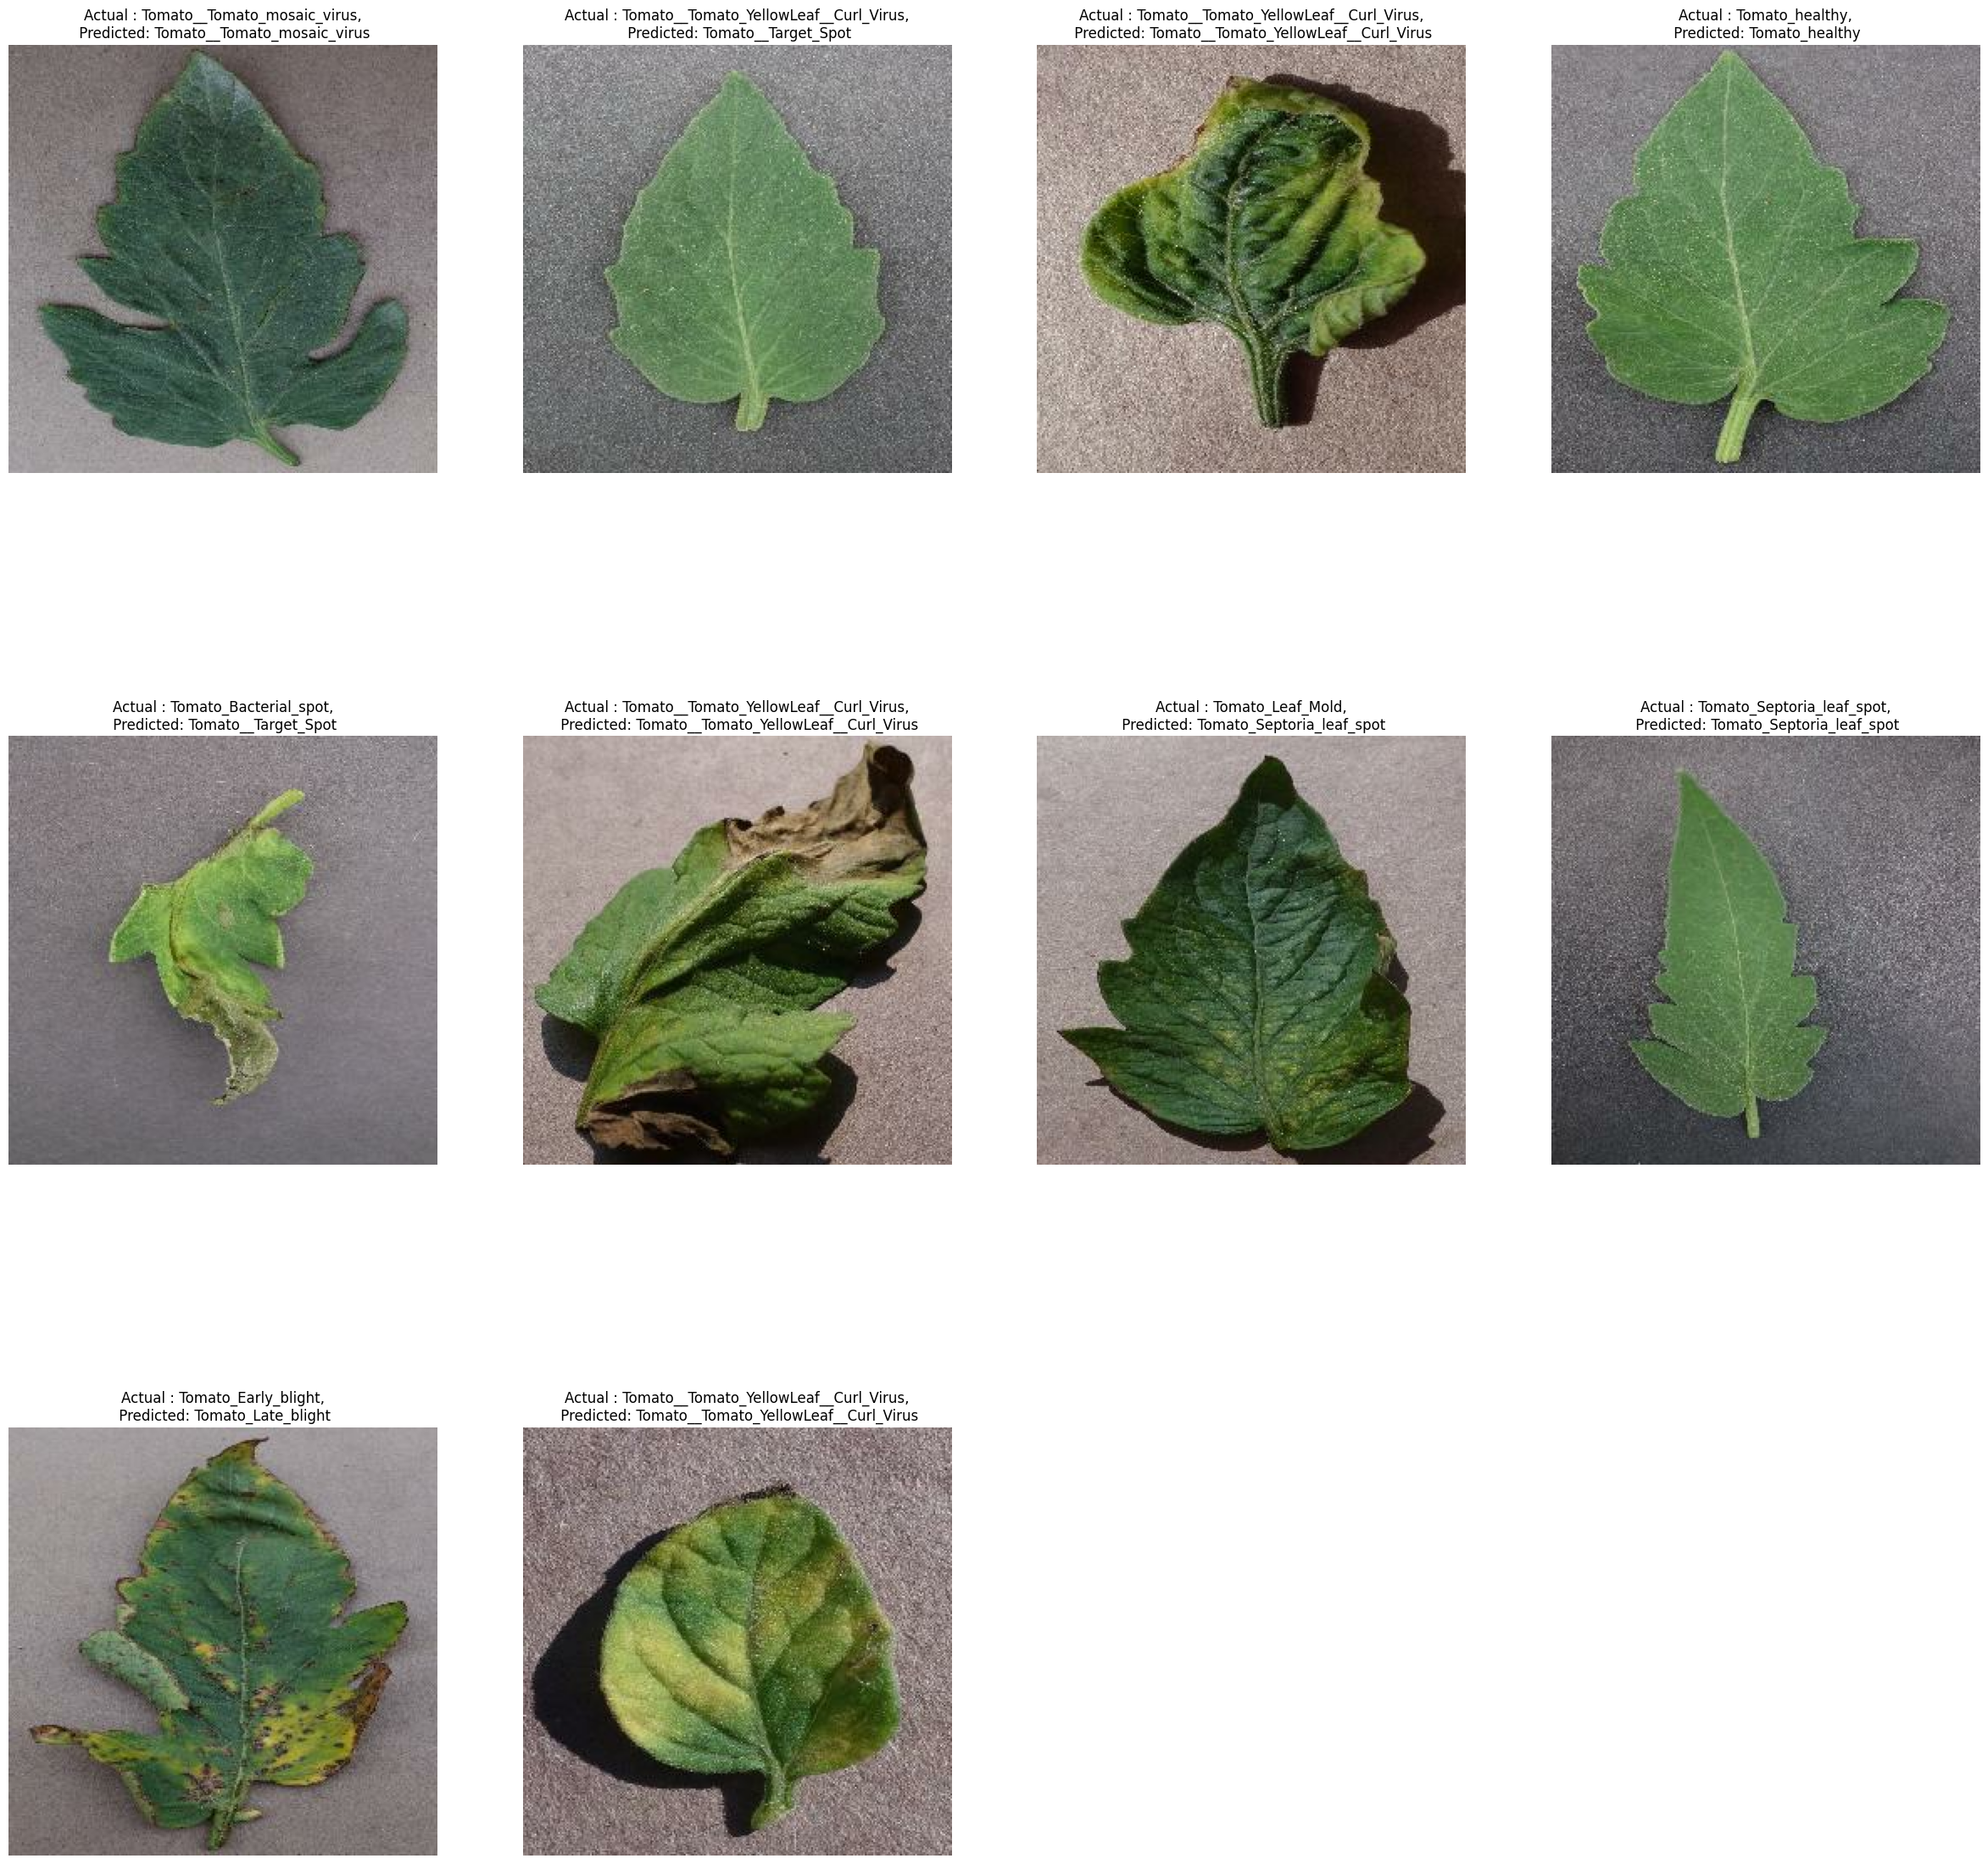

In [113]:
plt.figure(figsize = (30,30))
for images,labels in test_ds.take(1):
    for i in range(10):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        
        predicted_class = predict(model,images[i])
        actual_class = class_names[labels[i]]
        plt.title(f"Actual : {actual_class},\n Predicted: {predicted_class}")
        
        plt.axis("off")

In [114]:
from keras.models import load_model
from keras.models import model_from_json

# Assuming you have already trained and compiled your model and named it 'model'
# If not, replace 'model' with the name of your trained model variable

# Save the model architecture as JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights
model.save_weights("model_weights.weights.h5")  # Modify the filename to end with ".weights.h5"

# If you want to save the entire notebook with the model, you'll need to use another method,
# such as using Jupyter's built-in functions or a library like nbformat.

# Below is an example of saving the notebook using nbformat
import nbformat

# Load the notebook
with open('model.ipynb', 'r', encoding='utf-8') as f:
    nb = nbformat.read(f, as_version=4)

# Save the notebook with the model
nbformat.write(nb, 'model_with_saved_model.ipynb')
